Importing the necessary libraries needed 

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import  confusion_matrix, classification_report, accuracy_score

Reading the dataset.

In [2]:
df=pd.read_csv('fetal_health.csv')
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


light_decelerations                 : Number of light decelerations per second

severe_decelerations                : Number of severe decelerations per second

baseline value                      : FHR baseline (beats per minute)

accelerations Number                : of accelerations per second

fetal_movement                      : Number of fetal movements per second

uterine_contractions                : Number of uterine contractions per second

prolongued_decelerations            : Number of prolonged decelerations per second

abnormal_short_term_variability     :  Percentage of time with abnormal short term variability

mean_value_of_short_term_variability: Mean value of short term variability

percentage_of_time_with_abnormal_long_term_variability : Percentage of time with abnormal long term variability

mean_value_of_long_term_variability : Mean value of long term variability

histogram_width                     : Width of FHR histogram

histogram_min                       :Minimum (low frequency) of FHR histogram

histogram_max                       : Maximum (high frequency) of FHR histogram

histogram_number_of_peaks           : Number of histogram peaks

histogram_number_of_zeroes          : Number of histogram zeros

histogram_mode                      : Histogram mode

histogram_mean                      : Histogram mean

histogram_median                    : Histogram median

histogram_variance                  : Histogram variance

fetal_health                        : 1 (Normal), 2 (Suspect) and 3 (Pathological)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
baseline value,2126.0,133.303857,9.840844,106.0,126.000,133.000,140.000,160.000
accelerations,2126.0,0.003178,0.003866,0.0,0.000,0.002,0.006,0.019
fetal_movement,2126.0,0.009481,0.046666,0.0,0.000,0.000,0.003,0.481
uterine_contractions,2126.0,0.004366,0.002946,0.0,0.002,0.004,0.007,0.015
light_decelerations,2126.0,0.001889,0.002960,0.0,0.000,0.000,0.003,0.015
severe_decelerations,2126.0,0.000003,0.000057,0.0,0.000,0.000,0.000,0.001
prolongued_decelerations,2126.0,0.000159,0.000590,0.0,0.000,0.000,0.000,0.005
abnormal_short_term_variability,2126.0,46.990122,17.192814,12.0,32.000,49.000,61.000,87.000
mean_value_of_short_term_variability,2126.0,1.332785,0.883241,0.2,0.700,1.200,1.700,7.000
percentage_of_time_with_abnormal_long_term_variability,2126.0,9.846660,18.396880,0.0,0.000,0.000,11.000,91.000


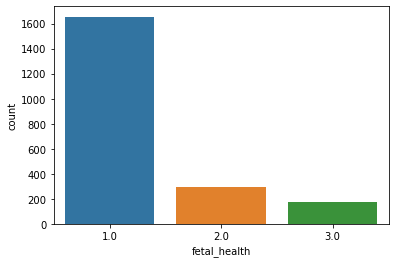

In [10]:
sns.countplot(data= df, x="fetal_health")

The  plot shows targets indicates an imbalance in data. This is a case that tends to provide misleading classification accuracy.

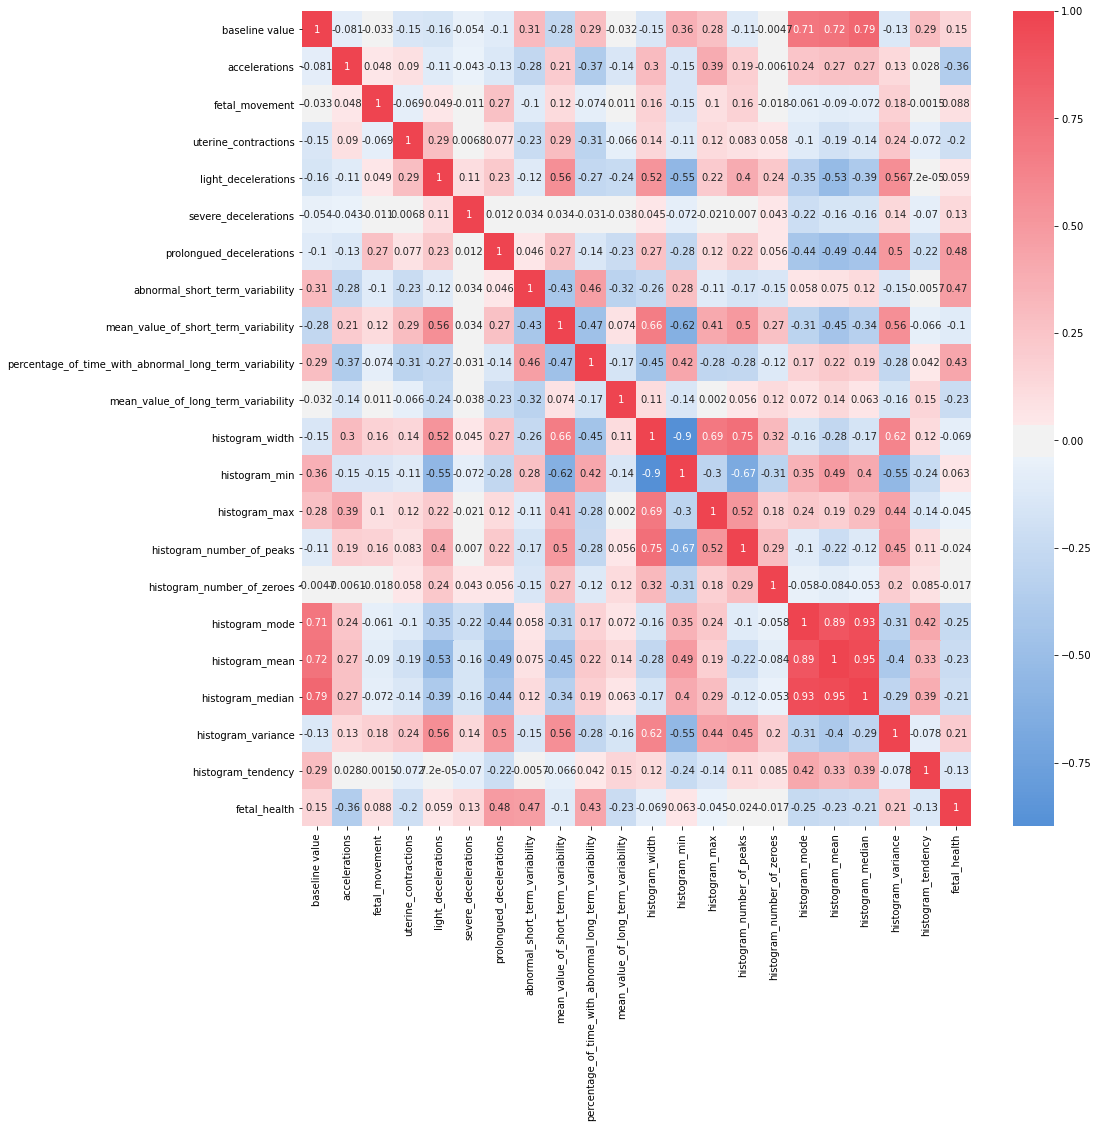

In [14]:
corrmat= df.corr()
plt.figure(figsize=(15,15))  

cmap = sns.diverging_palette(250, 10, s=80, l=55, n=9, as_cmap=True)

sns.heatmap(corrmat,annot=True, cmap=cmap, center=0)

There are features that have higher correlation with 'FETAL_HEALTH'. 
Lets plot some more graphs that will lead us a clear picture of how they impact fetus health.

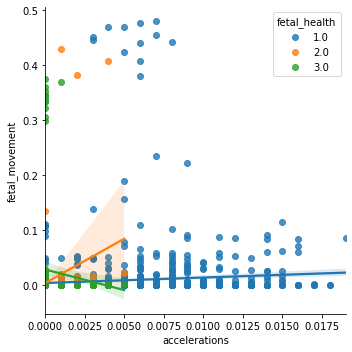

In [15]:
sns.lmplot(data =df,x="accelerations",y="fetal_movement", hue="fetal_health",legend_out=False)
plt.show()

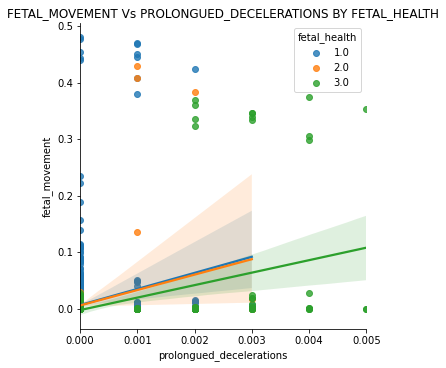

In [73]:
sns.lmplot(data =df,x="prolongued_decelerations",y="fetal_movement", hue="fetal_health",legend_out=False)
plt.title('FETAL_MOVEMENT Vs PROLONGUED_DECELERATIONS BY FETAL_HEALTH')
plt.show()

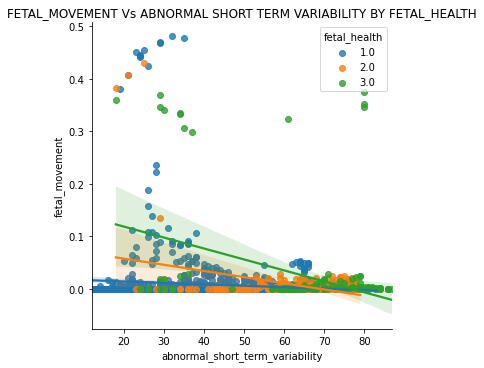

In [74]:
sns.lmplot(data =df,x="abnormal_short_term_variability",y="fetal_movement", hue="fetal_health",legend_out=False)
plt.title('FETAL_MOVEMENT Vs ABNORMAL SHORT TERM VARIABILITY BY FETAL_HEALTH')
plt.show()

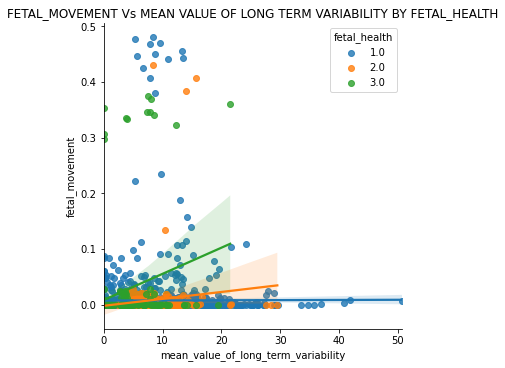

In [75]:
sns.lmplot(data =df,x="mean_value_of_long_term_variability",y="fetal_movement", hue="fetal_health",legend_out=False)
plt.title('FETAL_MOVEMENT Vs MEAN VALUE OF LONG TERM VARIABILITY BY FETAL_HEALTH')
plt.show()

From the above plots we can see the data contains outliers.
So Lets visualize the outliers using box plot

In [25]:
plot=['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability']

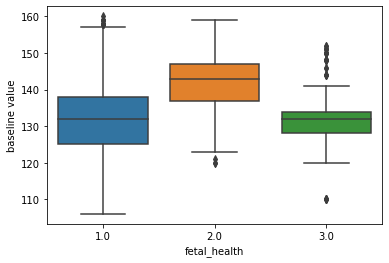

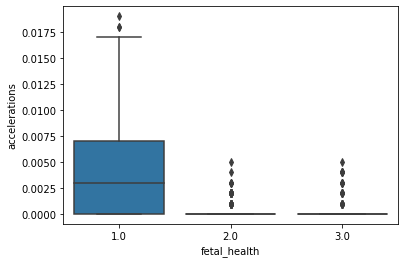

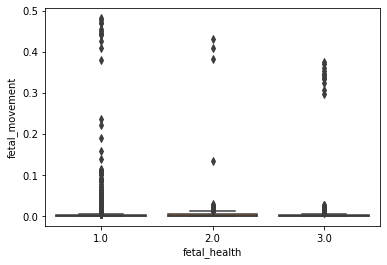

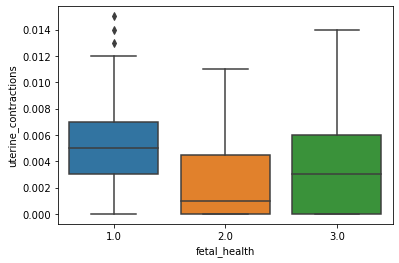

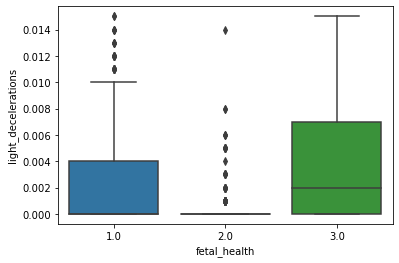

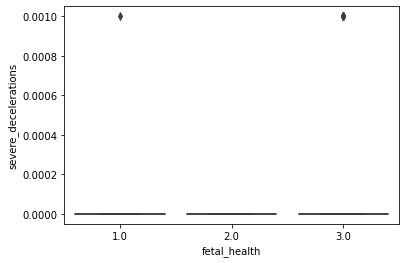

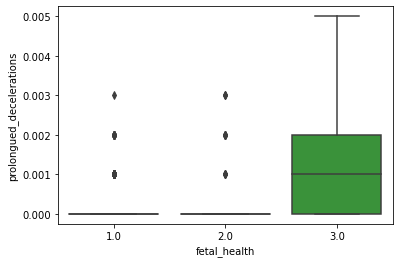

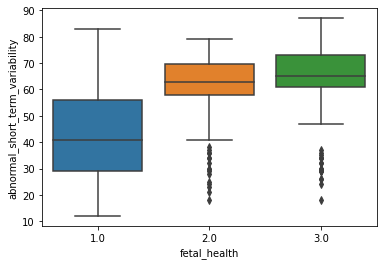

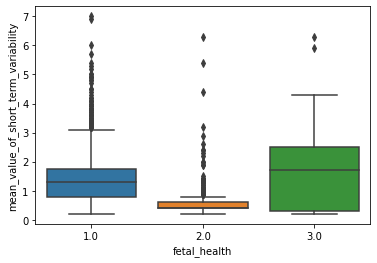

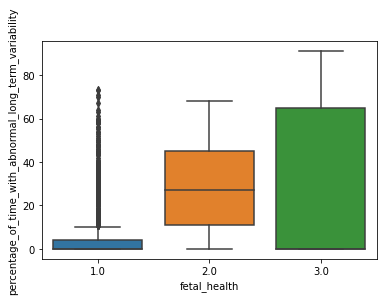

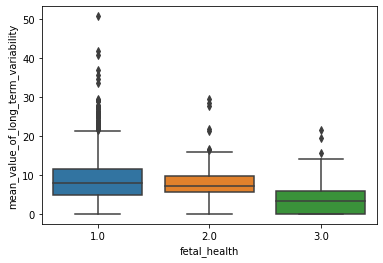

In [29]:
for i in plot:
    sns.boxplot(x=df["fetal_health"], y=df[i])
    plt.show()

#### It is not a good idea to remove them yet as it may lead to overfitting.
#### This is the outcome of a CTG report so it is unlikely that this was a data entry error.
####  Since it is natural part of the population it is highly recommeded not to remove these outliers.


In [33]:
x = df.iloc[:, 0: -1]
y = df.iloc[:, -1]

In [76]:
#APPLYING STANDARD SCALAR 
sc=StandardScaler()
x=sc.fit_transform(x)

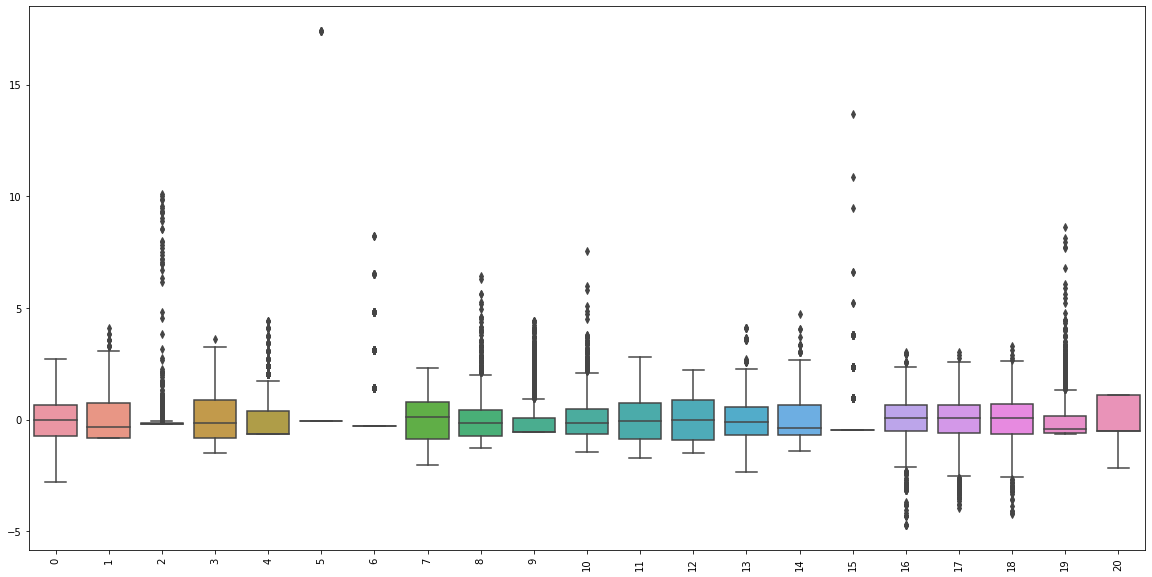

In [37]:
plt.figure(figsize=(20,10))
sns.boxplot(data =x)
plt.xticks(rotation=90)
plt.show()

In [77]:
#SPLITTING THE DATA INTO TRAIN AND TEST
X_train, X_test, y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

### MODEL BUILDING 

In [44]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [42]:
pipeline_lr=Pipeline([('lr_classifier',LogisticRegression(random_state=42))])
pipeline_dT=Pipeline([ ('dT_classifier',DecisionTreeClassifier(random_state=42))])
pipeline_Rf=Pipeline([('Rf_classifier',RandomForestClassifier())])
pipeline_svc=Pipeline([('svc',SVC())])
pipelines = [pipeline_lr, pipeline_dT, pipeline_Rf, pipeline_svc]
pipe_dict = {0: 'Logistic Regression', 1: 'Decision Tree', 2: 'RandomForest', 3: "SVC"}

In [43]:
for pipe in pipelines:
    pipe.fit(X_train,y_train)

In [45]:
cv_accuracy = []
for i, model in enumerate(pipelines):
    cv_score = cross_val_score(model, X_train,y_train, cv=10 )
    cv_accuracy.append(cv_score)
    print("%s: %f " % (pipe_dict[i], cv_score.mean()))

Logistic Regression: 0.897170 
Decision Tree: 0.916683 
RandomForest: 0.939525 
SVC: 0.906594 


In [49]:
pred_Rf=pipeline_Rf.predict(X_test)
accuracy=accuracy_score(y_test,pred_Rf)
print('ACCURACY :',accuracy)

ACCURACY : 0.9467084639498433


In [53]:
param_grid={
    'n_estimators': [100,150, 200,500,700,900],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,6,8,12,14,16],
    'criterion' :['gini', 'entropy'],
    'n_jobs':[-1,1,None]
}

In [56]:
Grid_cv_Rf=GridSearchCV(estimator=RandomForestClassifier(),param_grid=param_grid,cv=6)
Grid_cv_Rf.fit(X_train,y_train)

GridSearchCV(cv=6, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 6, 8, 12, 14, 16],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 150, 200, 500, 700, 900],
                         'n_jobs': [-1, 1, None]})

In [57]:
Grid_cv_Rf.best_params_

{'criterion': 'gini',
 'max_depth': 16,
 'max_features': 'auto',
 'n_estimators': 700,
 'n_jobs': -1}

In [78]:
RF=RandomForestClassifier(**Grid_cv_Rf.best_params_)
RF.fit(X_train,y_train)
predictions=RF.predict(X_test)
Accuracy=accuracy_score(y_test,predictions)*100
print('ACCURACY SCORE:',Accuracy)

ACCURACY SCORE: 94.35736677115987


In [80]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         1.0       0.95      0.98      0.97       496
         2.0       0.92      0.75      0.83       101
         3.0       0.88      0.93      0.90        41

    accuracy                           0.94       638
   macro avg       0.92      0.89      0.90       638
weighted avg       0.94      0.94      0.94       638



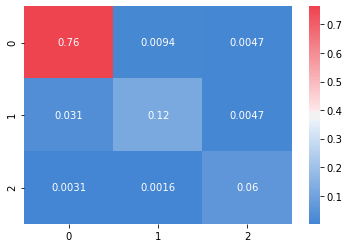

In [72]:
CF=confusion_matrix(y_test,predictions)
sns.heatmap(CF/np.sum(CF),annot=True,cmap=cmap,)